In [ ]:
!pip install matplotlib seaborn
!pip install wordcloud


In [ ]:
import pandas as pd
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
products_df = pd.read_csv('products.csv')
reviews_df = pd.read_csv('reviews.csv')

print(len(reviews_df))

21674


In [6]:
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

reviews_df['clean_text'] = reviews_df['text'].apply(preprocess_text)

In [7]:
sid = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    scores = sid.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

reviews_df['vader_sentiment_score'] = reviews_df['clean_text'].apply(analyze_sentiment_vader)

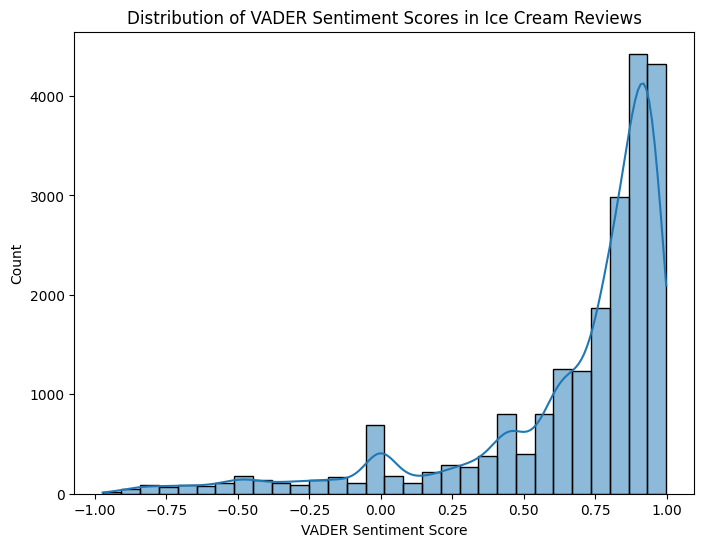

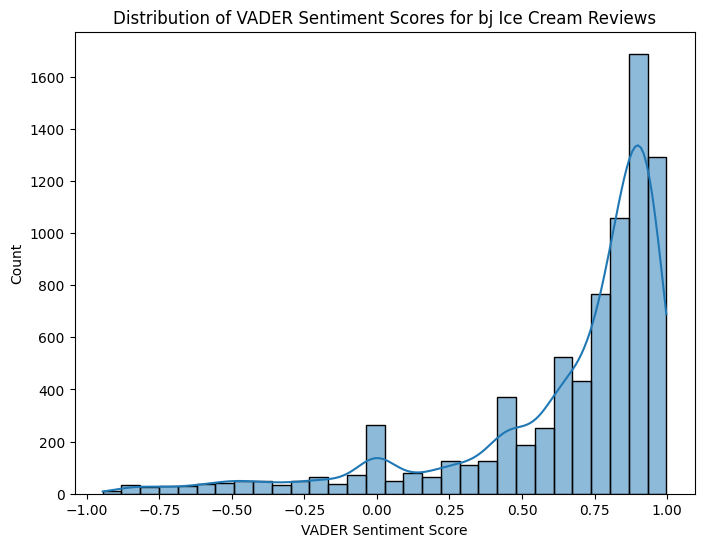

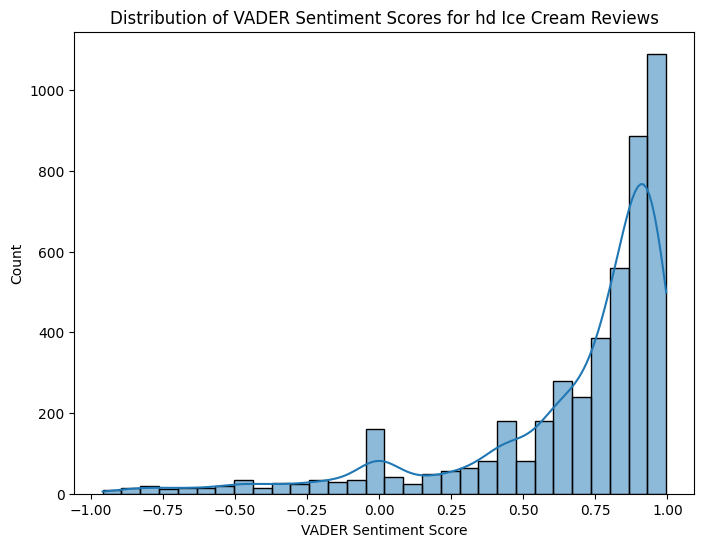

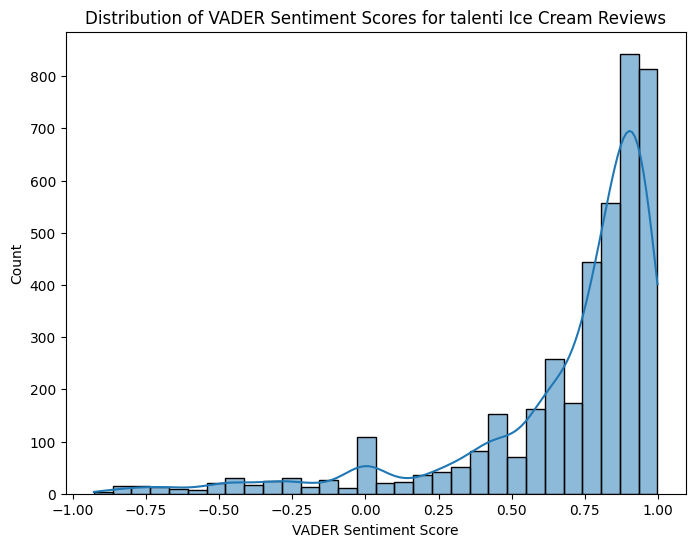

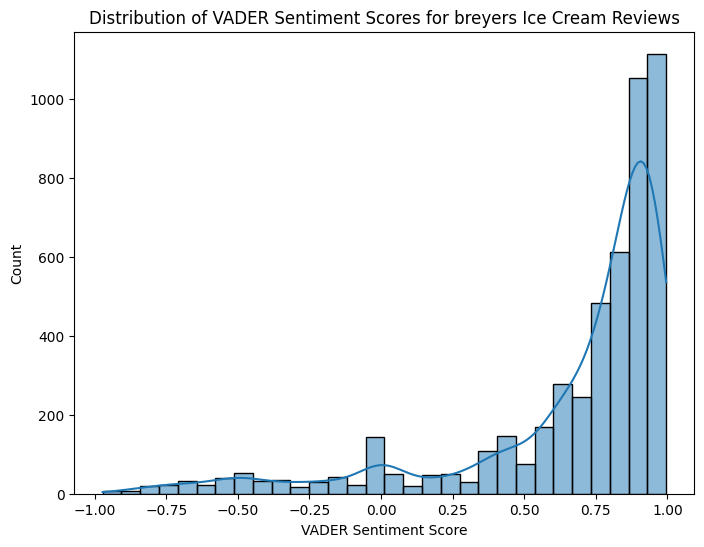

In [8]:
#Histogram

plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['vader_sentiment_score'], bins=30, kde=True)
plt.title('Distribution of VADER Sentiment Scores in Ice Cream Reviews')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Count')
plt.show()

unique_brands = reviews_df['brand'].unique()

for brand in unique_brands:
    brand_reviews_df = reviews_df[reviews_df['brand'] == brand]
    
    plt.figure(figsize=(8, 6))
    sns.histplot(brand_reviews_df['vader_sentiment_score'], bins=30, kde=True)
    plt.title(f'Distribution of VADER Sentiment Scores for {brand} Ice Cream Reviews')
    plt.xlabel('VADER Sentiment Score')
    plt.ylabel('Count')
    plt.show()


In [9]:
#Sentiment by Brand

brand_sentiment_vader = reviews_df.groupby('brand')['vader_sentiment_score'].mean().reset_index()

print("In conclusion, the VADER sentiment analysis of ice cream reviews revealed...")
print(brand_sentiment_vader)

In conclusion, the VADER sentiment analysis of ice cream reviews revealed...
     brand  vader_sentiment_score
0       bj               0.655261
1  breyers               0.669087
2       hd               0.673578
3  talenti               0.693003


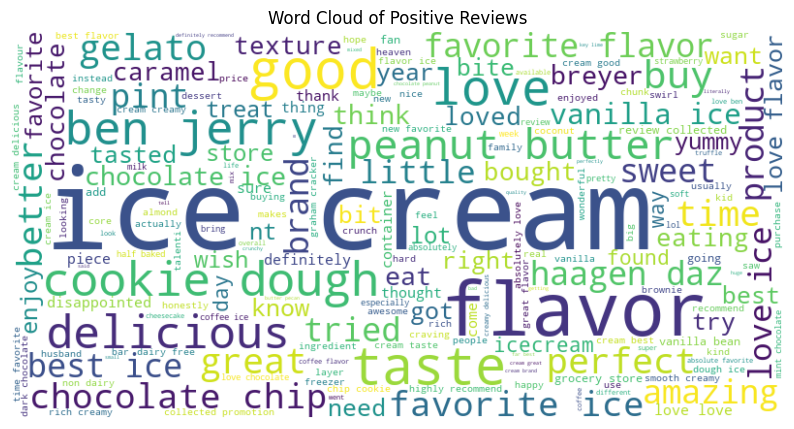

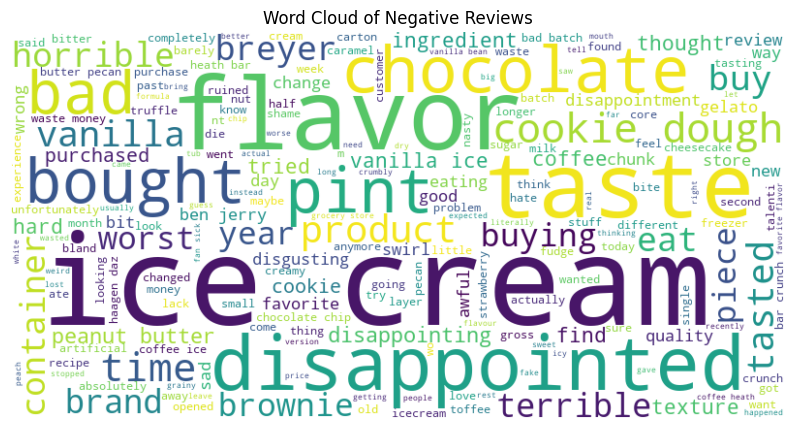

In [10]:
#Word Clouds

positive_reviews = reviews_df[reviews_df['vader_sentiment_score'] > 0.5]
negative_reviews = reviews_df[reviews_df['vader_sentiment_score'] < -0.5]

#Positive
positive_text = ' '.join(positive_reviews['clean_text'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Positive Reviews')
plt.show()

#Negative
negative_text = ' '.join(negative_reviews['clean_text'])

negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

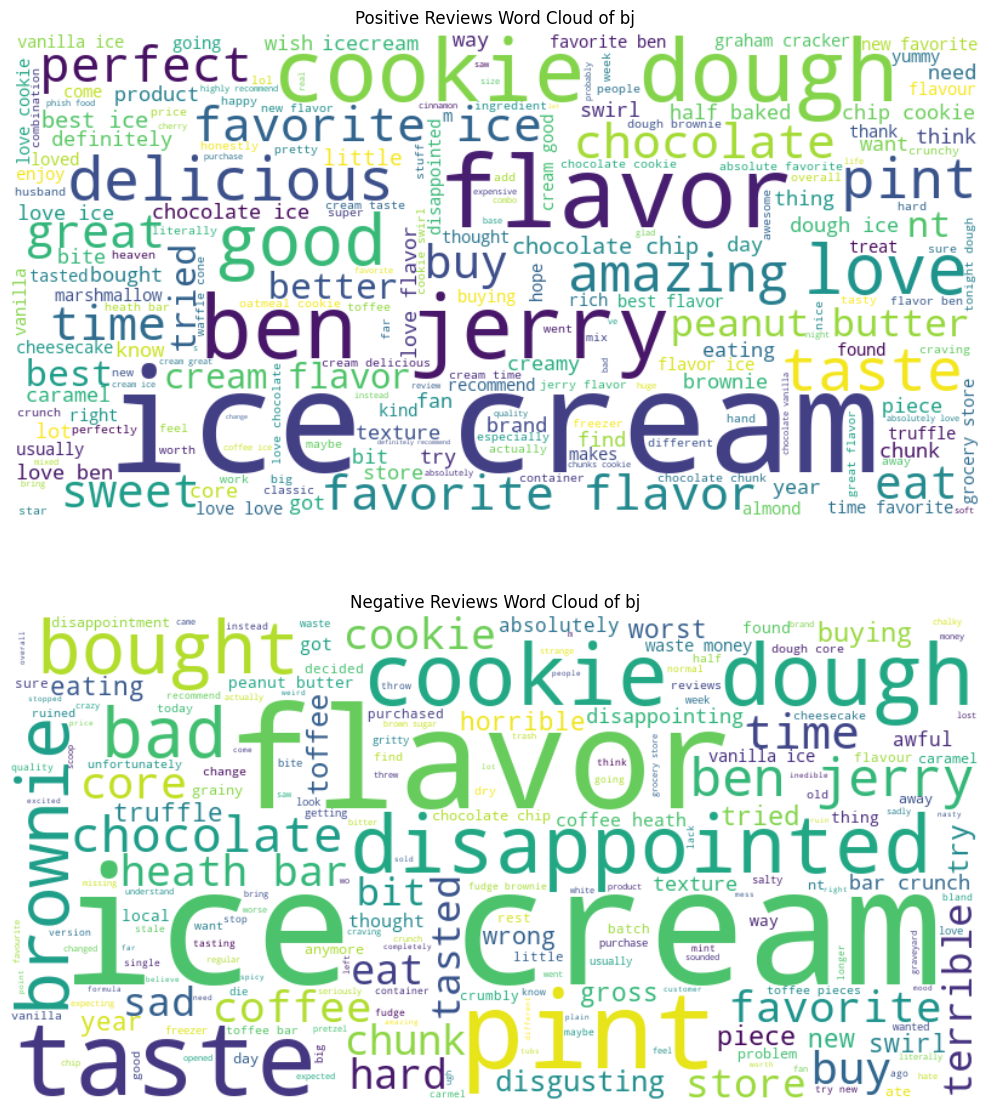

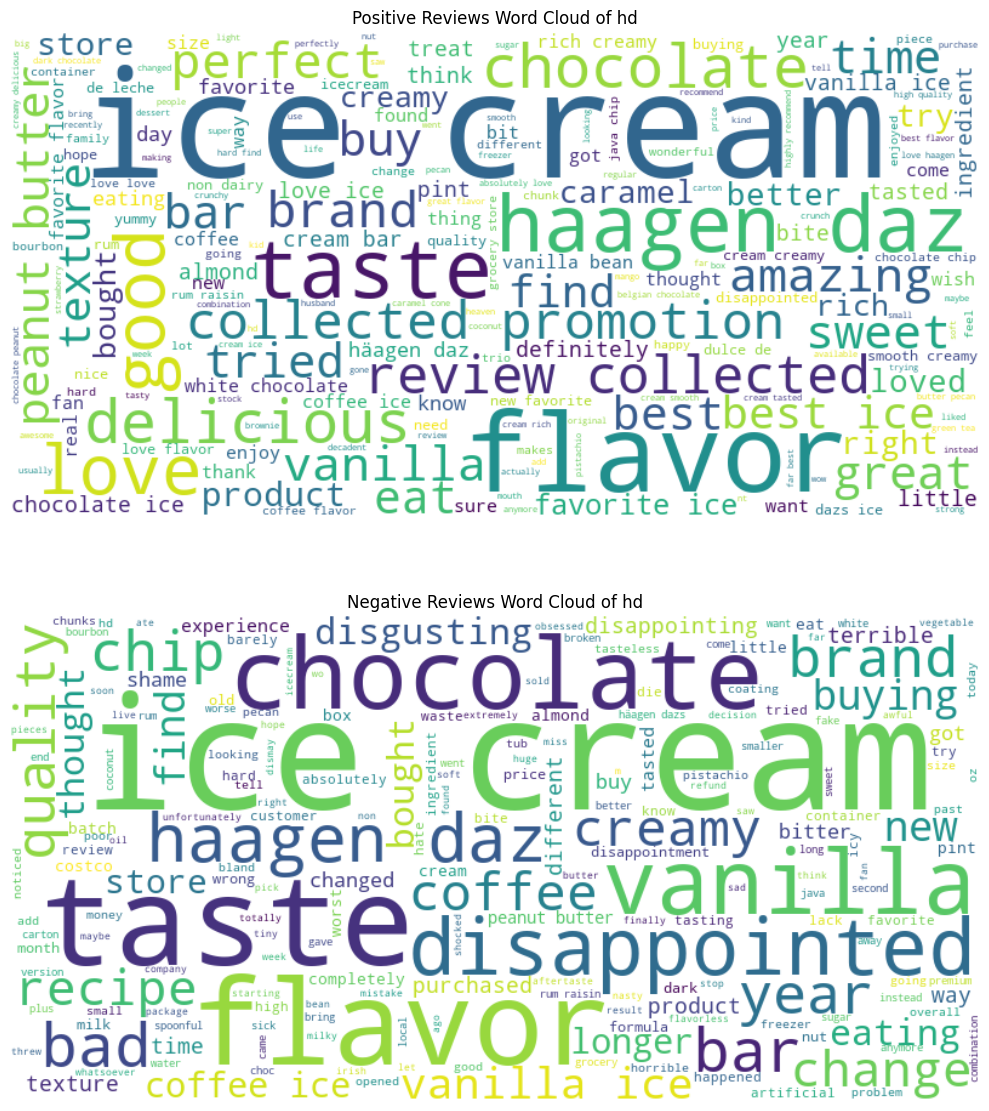

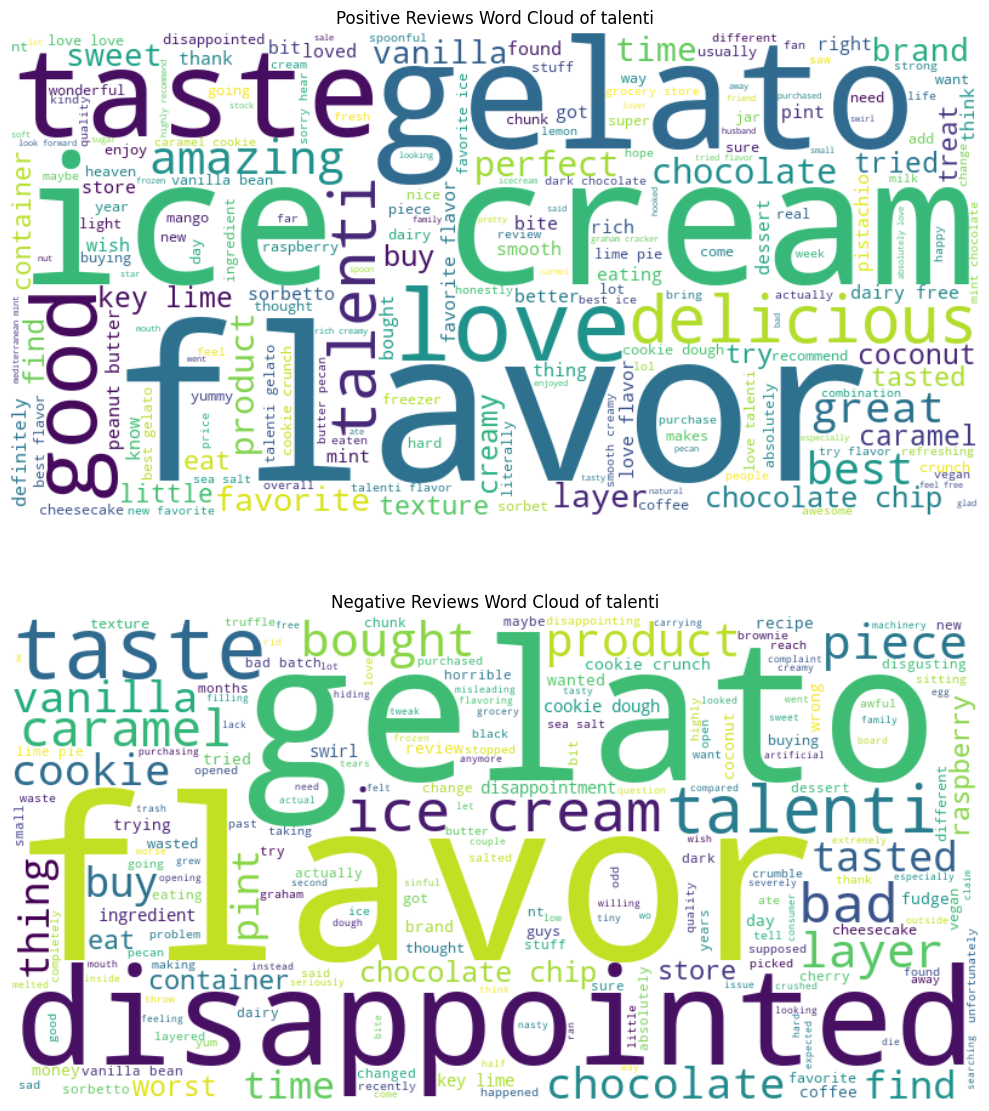

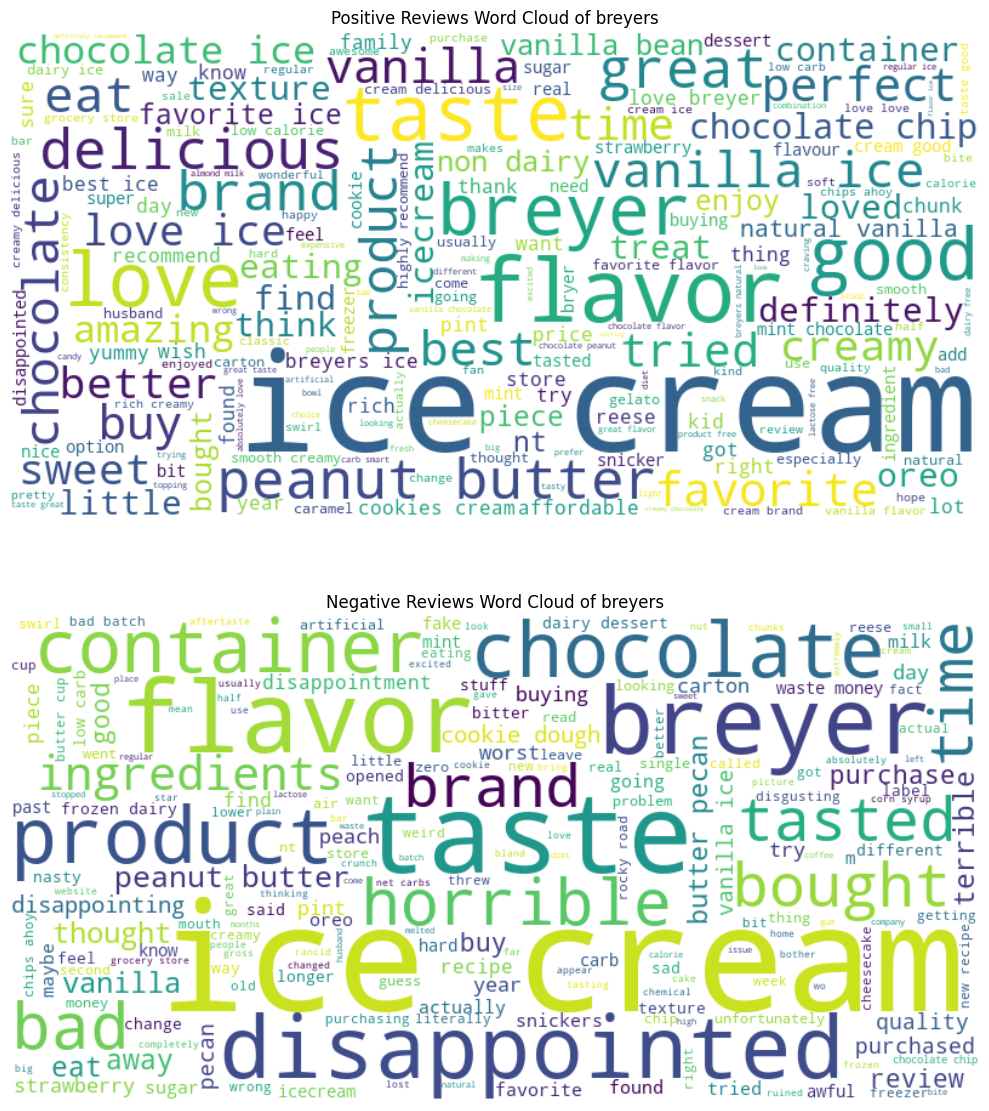

In [12]:
positive_threshold = 0.5
negative_threshold = -0.5

for brand in unique_brands:
    brand_reviews_df = reviews_df[reviews_df['brand'] == brand]
    
    positive_reviews = brand_reviews_df[brand_reviews_df['vader_sentiment_score'] > positive_threshold]
    negative_reviews = brand_reviews_df[brand_reviews_df['vader_sentiment_score'] < negative_threshold]
    
    positive_text = ' '.join(positive_reviews['clean_text'])
    
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    
    negative_text = ' '.join(negative_reviews['clean_text'])
    
    negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    
    plt.figure(figsize=(10, 12))
    plt.subplot(2, 1, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title(f'Positive Reviews Word Cloud of {brand}')
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title(f'Negative Reviews Word Cloud of {brand}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

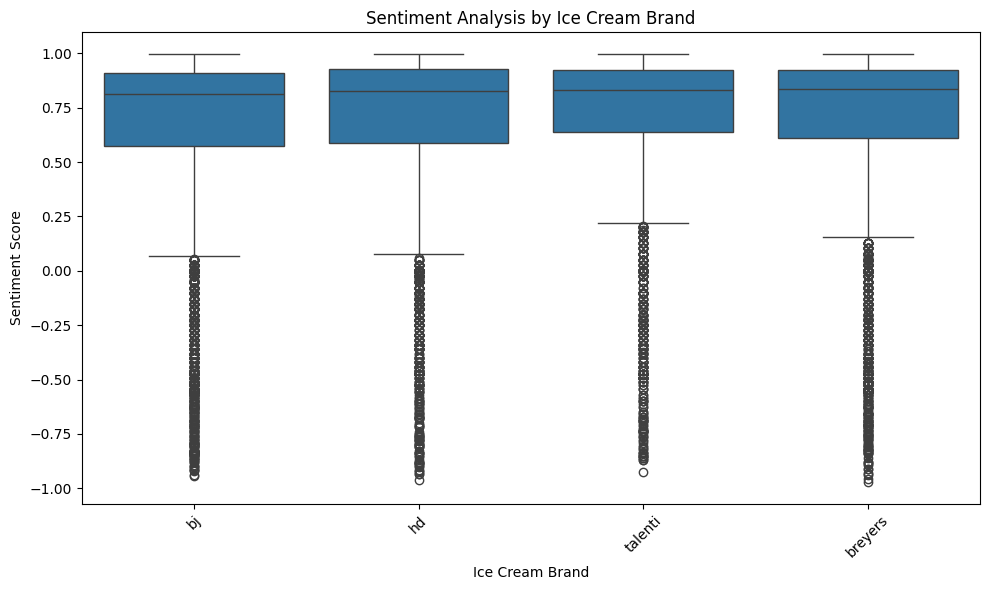

In [13]:
#Boxplot

ice_cream_df = pd.DataFrame({
    'Brand': ['bj', 'hd', 'breyers', 'talenti'],
    'Sentiment_Score': [0.75, 0.80, 0.70, 0.60]
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='vader_sentiment_score', data=reviews_df)
plt.title('Sentiment Analysis by Ice Cream Brand')
plt.xlabel('Ice Cream Brand')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
